 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


Bad key text.latex.preview in file C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvpath = Path("Resources/whale_returns.csv")
csvpath

WindowsPath('Resources/whale_returns.csv')

In [26]:
whale_dataframe = pd.read_csv(
    csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_dataframe = whale_dataframe.sort_index()
whale_dataframe.head()



#algo_dataframe = Path("Resources/algo_returns.csv")
#algo_dataframe
#algo_dataframe = pd.read_csv(
#    algo_dataframe, index_col="Date", infer_datetime_format=True, parse_dates=True)
#algo_dataframe = algo_dataframe.sort_index()
#algo_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_dataframe.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [5]:
# Drop nulls
whale_dataframe.dropna(inplace=True)
whale_dataframe

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_dataframe = Path("Resources/algo_returns.csv")
algo_dataframe



WindowsPath('Resources/algo_returns.csv')

In [7]:
#algo_dataframe = pd.read_csv(algo_dataframe)
#algo_dataframe.head()

algo_dataframe = pd.read_csv(
    algo_dataframe, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_dataframe = algo_dataframe.sort_index()
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_dataframe.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [9]:
# Drop nulls
algo_dataframe.dropna(inplace=True)
algo_dataframe

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
#Using 4.2.10 as my model here.

sp500_df = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(
    sp500_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [13]:
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [14]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,3.155106
2012-10-04,0.979467
2012-10-05,-1.044827


In [16]:
# Drop nulls
sp500_df = sp500_df.dropna().copy()
sp500_df.head()

,Close
Date,
2012-10-03,3.155106
2012-10-04,0.979467
2012-10-05,-1.044827
2012-10-08,9.748138
2012-10-09,1.861376


In [17]:
# Rename `Close` Column to be specific to this portfolio.
#Pandas.4.2 "columns" as my reference

sp500_df = sp500_df.rename(columns={
    "Date": "Date",
    "Close": "SP500",
})

sp500_df.head()                               

,SP500
Date,
2012-10-03,3.155106
2012-10-04,0.979467
2012-10-05,-1.044827
2012-10-08,9.748138
2012-10-09,1.861376


## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
#Using 4.2.10 as my model

combined_data = pd.concat([whale_dataframe,algo_dataframe, sp500_df], axis="columns", join="inner")
combined_data

#column_appended_data = pd.concat([msft_df, sp500_df], axis="rows", join="inner")
#column_appended_data

#all_portfolios = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
#all_portfolios.head()

#I cannot get the SP500_df to add to this combined data data frame.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,-3.071830
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-1.741001
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.033072
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,-1.272547
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-12.850368
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-1.809253
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-5.463942
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-1.694469


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

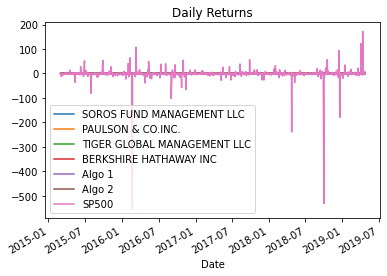

In [29]:
# Plot daily returns of all portfolios
combined_data.plot(title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}>

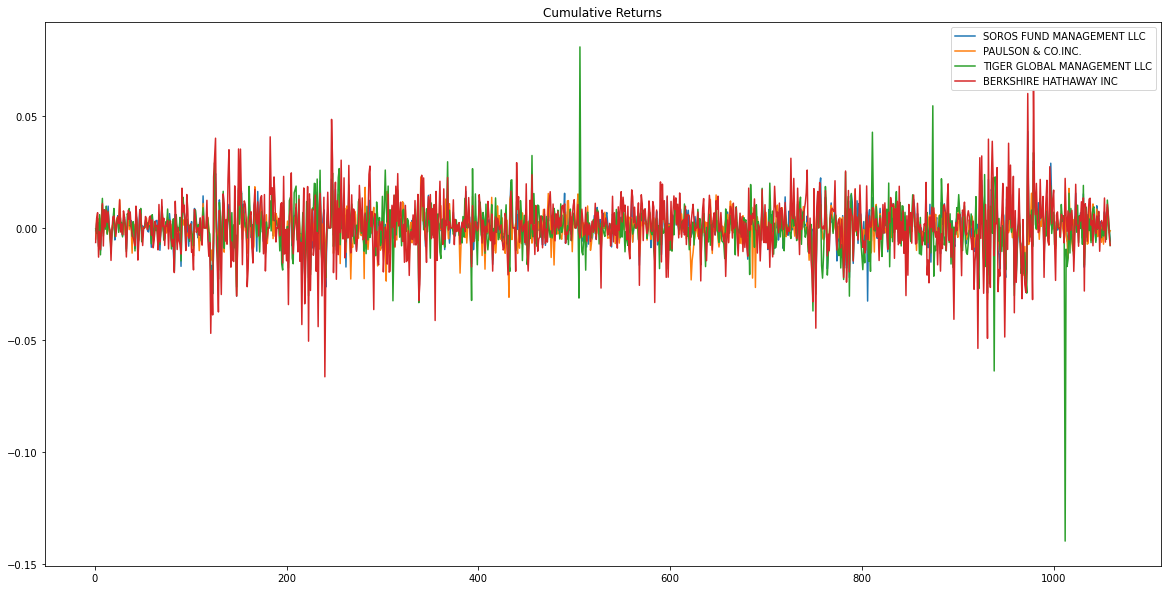

In [20]:
# Calculate cumulative returns of all portfolios
#combined_data.cumprod() (I seem to have an error here)
#all_returns.head
combined_data.plot(figsize=(20, 10), title="Cumulative Returns")

In [30]:
# Plot cumulative returns
combined_data.pct_change()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,-0.761929,-1.296713,-0.433237
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.981004
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,37.477539
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,9.098145
...,...,...,...,...,...,...,...
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,0.651935
2019-04-17,-2.073108,-17.661104,4.306537,2.851033,0.483294,-2.803170,2.020000
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,-0.942926,-0.764890,-0.689882


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

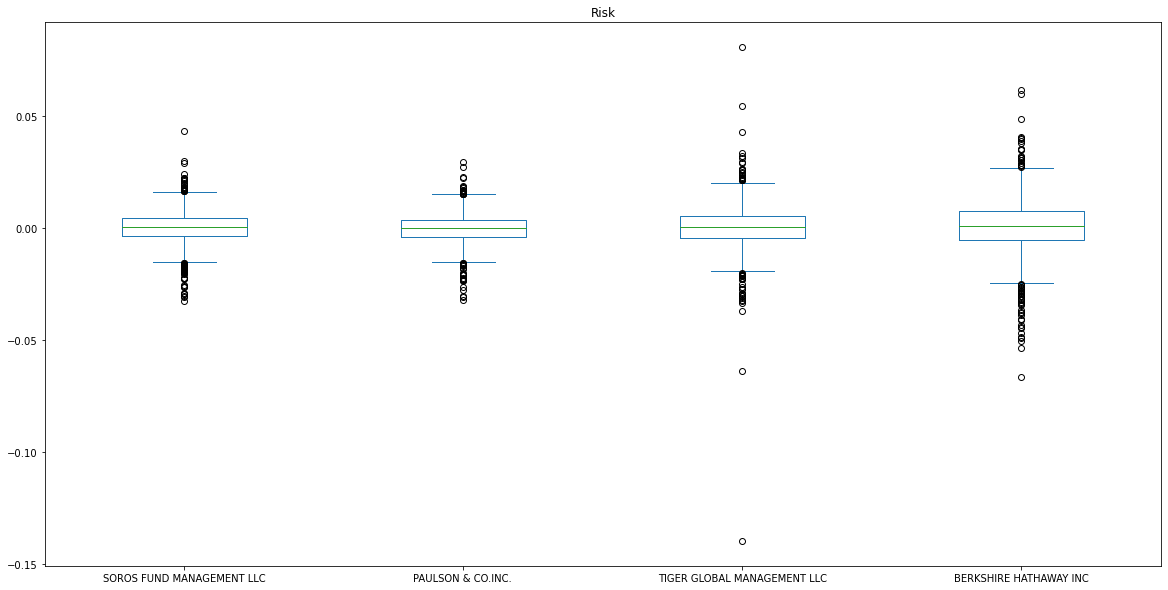

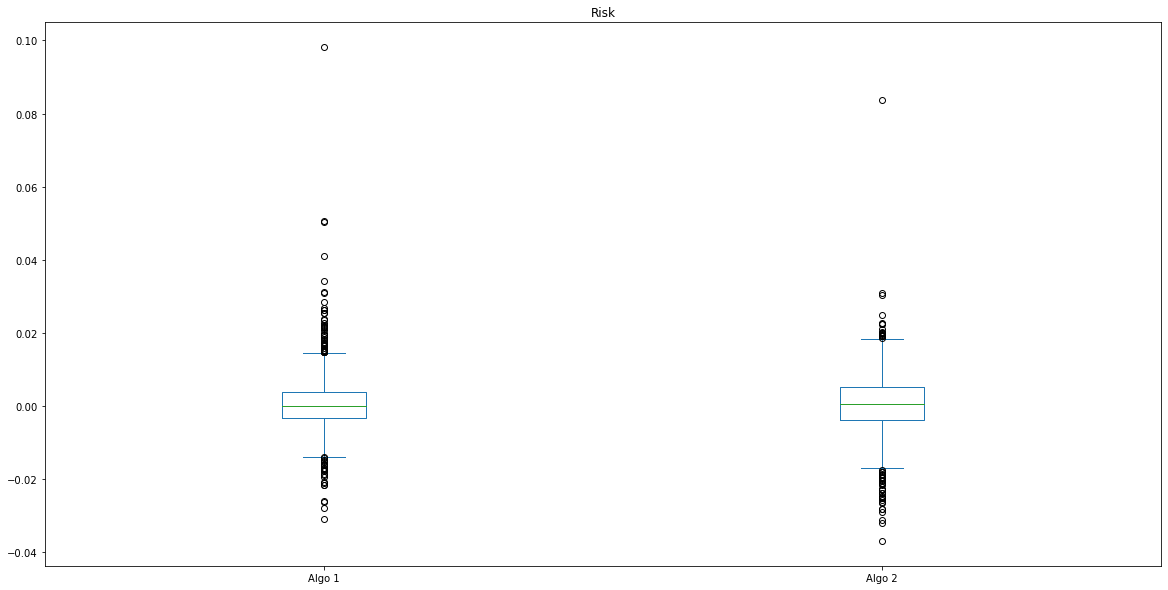

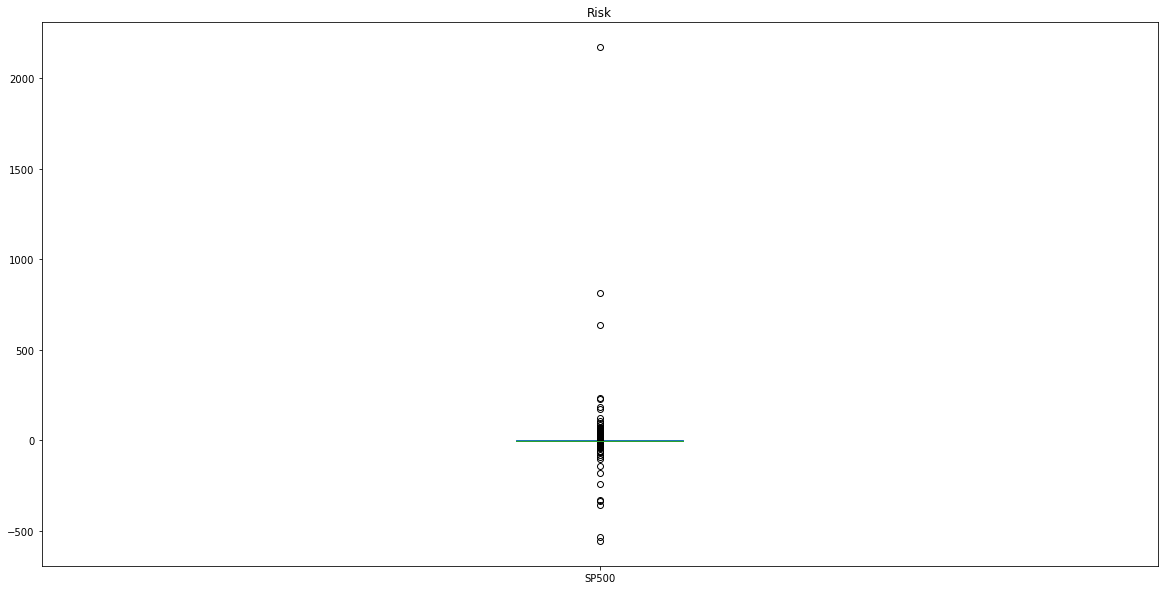

In [31]:
# Box plot to visually show risk
whale_dataframe.plot.box(figsize=(20,10), title="Risk")
algo_dataframe.plot.box(figsize=(20,10), title ="Risk")
sp500_df.plot.box(figsize=(20,10), title = "Risk")


### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
whale_dataframe.std()


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [33]:
# Calculate the daily standard deviations of all portfolios
algo_dataframe.std()


Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [34]:
# Calculate the daily standard deviations of all portfolios
sp500_df.std()

SP500   NaN
dtype: float64

In [35]:
combined_data.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
SP500                               NaN
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [41]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_data["SP500"].std()
# Determine which portfolios are riskier than the S&P 500
combined_data.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized standard deviation (252 trading days)
annualized_deviation_df = combined_data.std() * np.sqrt(252)
annualized_deviation_df



SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
SP500                               NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Standard Deviation'}>

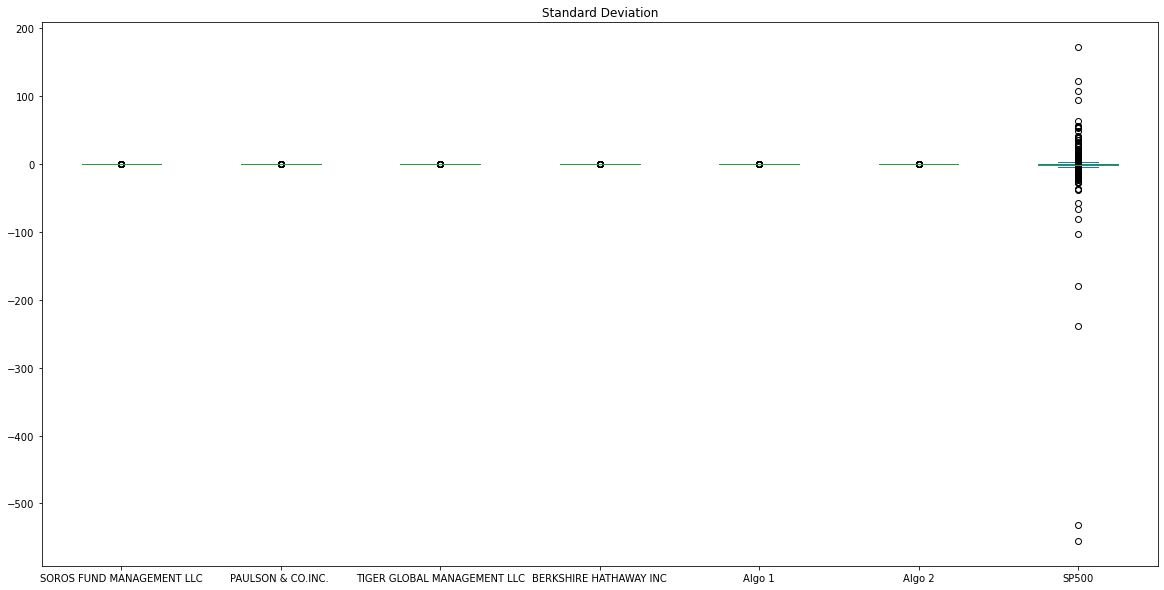

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_data.plot.box(figsize=(20, 10), title="Standard Deviation")
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [49]:
# Calculate the correlation
corr_df = combined_data.corr()
corr_df
# Display de correlation matrix
corr_df.style.background_gradient(cmap="Accent")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,-0.014070
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,-0.009986
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.007296
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.010328
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,-0.033061
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,-0.043585
SP500,-0.014070,-0.009986,-0.007296,-0.010328,-0.033061,-0.043585,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

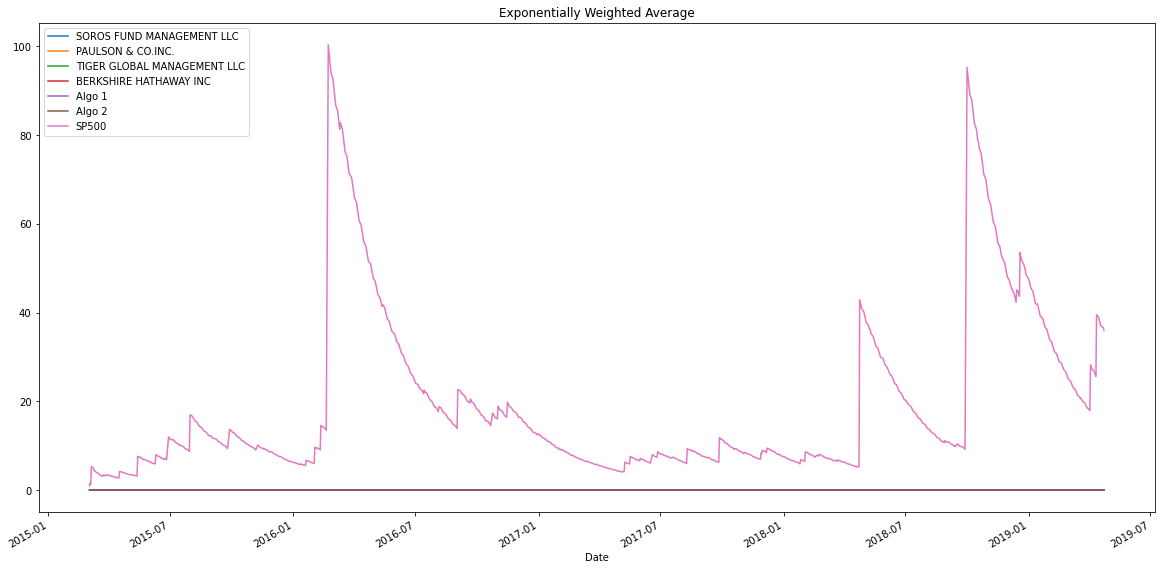

In [51]:
# Use `ewm` to calculate the rolling window
combined_data.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [56]:
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,-3.071830
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-1.741001
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.033072
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,-1.272547
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-12.850368
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-1.809253
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-5.463942
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-1.694469


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
SP500                               NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

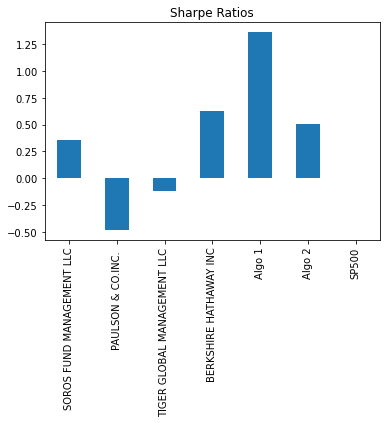

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [62]:
# Reading data from 1st stock
ford_path = Path("Resources/Ford.csv")
ford_path

WindowsPath('Resources/Ford.csv')

In [63]:
ford_df = pd.read_csv(ford_path)
ford_df.head()

,Date,Close
0,6/1/2021 16:00,14.81
1,6/2/2021 16:00,14.91
2,6/3/2021 16:00,15.99
3,6/4/2021 16:00,15.97
4,6/7/2021 16:00,15.88


In [64]:
# Reading data from 2nd stock
toyota_path = Path("Resources/Toyota.csv")
toyota_path

WindowsPath('Resources/Toyota.csv')

In [65]:
toyota_df = pd.read_csv(toyota_path)
toyota_df.head()

,Date,Close
0,6/1/2021 16:00,172.34
1,6/2/2021 16:00,176.63
2,6/3/2021 16:00,179.67
3,6/4/2021 16:00,182.41
4,6/7/2021 16:00,180.80


In [66]:
# Reading data from 3rd stock
gm_path = Path("Resources/GM.csv")
gm_path

WindowsPath('Resources/GM.csv')

In [67]:
gm_df = pd.read_csv(gm_path)
gm_df.head()

,Date,Close
0,6/1/2021 16:00,59.65
1,6/2/2021 16:00,59.65
2,6/3/2021 16:00,63.46
3,6/4/2021 16:00,63.37
4,6/7/2021 16:00,63.23


In [82]:
# Combine all stocks in a single DataFrame
new_combined_data = pd.concat([toyota_df, ford_df, gm_df], axis="columns", join="inner")
new_combined_data

,Date,Close,Date,Close,Date,Close
0,6/1/2021 16:00,172.34,6/1/2021 16:00,14.81,6/1/2021 16:00,59.65
1,6/2/2021 16:00,176.63,6/2/2021 16:00,14.91,6/2/2021 16:00,59.65
2,6/3/2021 16:00,179.67,6/3/2021 16:00,15.99,6/3/2021 16:00,63.46
3,6/4/2021 16:00,182.41,6/4/2021 16:00,15.97,6/4/2021 16:00,63.37
4,6/7/2021 16:00,180.80,6/7/2021 16:00,15.88,6/7/2021 16:00,63.23
...,...,...,...,...,...,...
145,12/27/2021 16:00,185.90,12/27/2021 16:00,20.80,12/27/2021 16:00,57.43
146,12/28/2021 16:00,184.75,12/28/2021 16:00,20.76,12/28/2021 16:00,57.11
147,12/29/2021 16:00,183.68,12/29/2021 16:00,20.56,12/29/2021 16:00,57.23
148,12/30/2021 16:00,184.08,12/30/2021 16:00,20.47,12/30/2021 16:00,58.13


In [83]:
# Reset Date index
new_combined_data = new_combined_data.reset_index()
new_combined_data.head()
#add 1 date for index

,index,Date,Close,Date,Close,Date,Close
0,0,6/1/2021 16:00,172.34,6/1/2021 16:00,14.81,6/1/2021 16:00,59.65
1,1,6/2/2021 16:00,176.63,6/2/2021 16:00,14.91,6/2/2021 16:00,59.65
2,2,6/3/2021 16:00,179.67,6/3/2021 16:00,15.99,6/3/2021 16:00,63.46
3,3,6/4/2021 16:00,182.41,6/4/2021 16:00,15.97,6/4/2021 16:00,63.37
4,4,6/7/2021 16:00,180.80,6/7/2021 16:00,15.88,6/7/2021 16:00,63.23


In [84]:
# Reorganize portfolio data by having a column per symbol
new_combined_data.drop(columns=['Date','index'], inplace=True)
new_combined_data

#rename column headers

,Close,Close,Close
0,172.34,14.81,59.65
1,176.63,14.91,59.65
2,179.67,15.99,63.46
3,182.41,15.97,63.37
4,180.80,15.88,63.23
...,...,...,...
145,185.90,20.80,57.43
146,184.75,20.76,57.11
147,183.68,20.56,57.23
148,184.08,20.47,58.13


In [85]:
# Calculate daily returns
daily_returns = new_combined_data.pct_change()
daily_returns.head()
# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,Close,Close,Close
1,0.024893,0.006752,0.000000
2,0.017211,0.072435,0.063873
3,0.015250,-0.001251,-0.001418
4,-0.008826,-0.005636,-0.002209
5,-0.006582,-0.015743,0.010913


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [86]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)

# Display sample data
weighted_returns.head()

1    0.010548
2    0.051173
3    0.004194
4   -0.005557
5   -0.003804
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
combined_data["Custom"] = weighted_returns
combined_data.tail()

#add dates

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-1.809253,NaN
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-5.463942,NaN
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-1.694469,NaN
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.359091,NaN
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,7.736057,NaN


In [91]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_data = combined_data.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [92]:
# Calculate the annualized `std`
risk_analysis = combined_data.std() * np.sqrt(252)
risk_analysis

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
SP500                         NaN
Custom                        NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

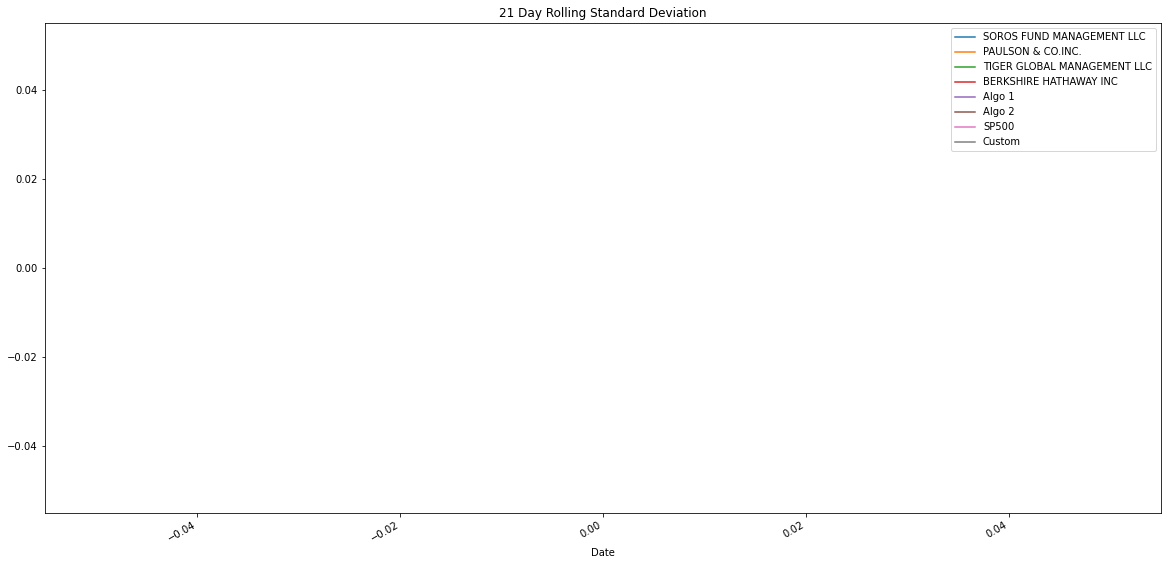

In [93]:
# Calculate rolling standard deviation
rolling_std = combined_data.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [95]:
# Calculate and plot the correlation
df = combined_data.corr()
df.style.background_gradient(cmap="bwr")

C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\13212\Anaconda3\envs\pyvizenv\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
SOROS FUND MANAGEMENT LLC,nan,nan,nan,nan,nan,nan,nan,nan
PAULSON & CO.INC.,nan,nan,nan,nan,nan,nan,nan,nan
TIGER GLOBAL MANAGEMENT LLC,nan,nan,nan,nan,nan,nan,nan,nan
BERKSHIRE HATHAWAY INC,nan,nan,nan,nan,nan,nan,nan,nan
Algo 1,nan,nan,nan,nan,nan,nan,nan,nan
Algo 2,nan,nan,nan,nan,nan,nan,nan,nan
SP500,nan,nan,nan,nan,nan,nan,nan,nan
Custom,nan,nan,nan,nan,nan,nan,nan,nan


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [96]:
# Calculate and plot Beta
covariance = combined_portfolios["Custom"].rolling(window=60).cov(all_portfolios["S&P 500"])
variance = combined_portfolios["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

NameError: name 'combined_portfolios' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [97]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios

NameError: name 'combined_portfolios' is not defined

<AxesSubplot:title={'center':'Sharpe Ratios'}>

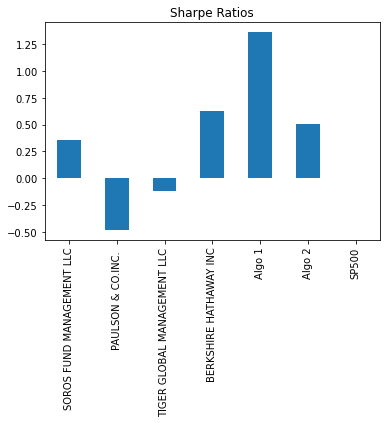

In [98]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!